<h1><center>Predicting Term Deposit Subscriptions</cenyer></h1>

# Load dataset

In [2]:
# import the libraries needed for exploratory data analysis and cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# load and separate dataset properly
data = pd.read_csv('data\\bank-full.csv', sep=";")

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Dataset Exploration and Analysis

### Get shape of dataset

In [5]:
# identify shape of dataset
shape = data.shape

In [6]:
print("Shape of data set: ", shape)

Shape of data set:  (45211, 17)


### Basic information of dataset

In [7]:
# get basic info about dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Display a summary of numerical columns
print("Summary Statistics:")
summary = data.describe()
summary

Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Check Null/Missing Values

In [9]:
# get null value count in dataset
null_values = data.isnull().sum()

In [10]:
print("Number of null values :\n", null_values)

Number of null values :
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Check duplicate values

In [11]:
# check duplicate values(row) in dataset
duplicates = data.duplicated().sum()

In [12]:
print("Total number of duplicate values : ", duplicates)

Total number of duplicate values :  0


### Check outliers in dataset

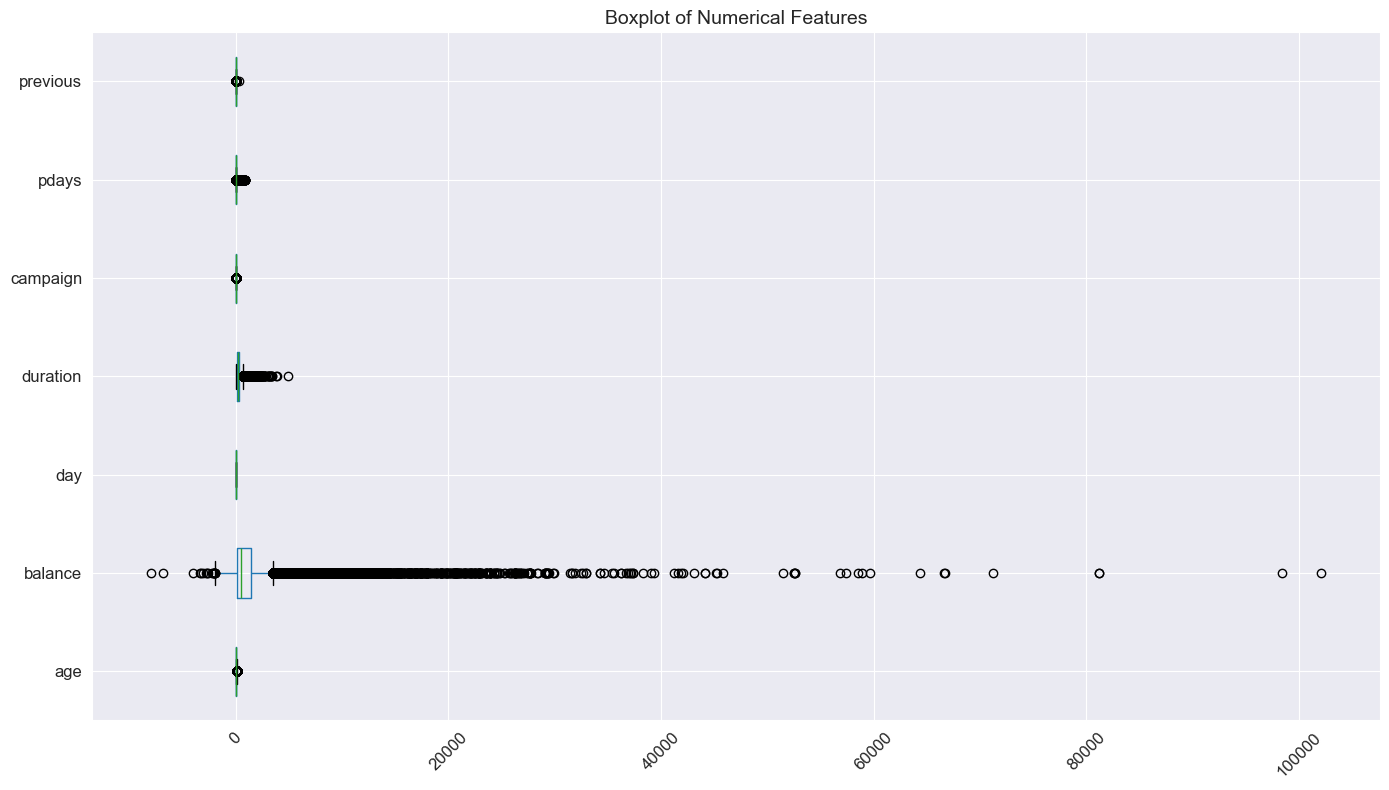

In [13]:
# generate boxplot for all numerical features
plt.figure(figsize=(14, 8))
data.boxplot(vert=False)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Identify features in dataset

In [14]:
# get all the features of dataset
features = data.columns

In [15]:
features

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
print("Total number of features : ", len(features))

Total number of features :  17


### Explore Categorical Features

In [17]:
# get categorical features of dataset (without target feature)
categorical_features = data.select_dtypes(include=['object']).columns[:-1]

In [18]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [19]:
print("Total number of categorical features : ", len(categorical_features))

Total number of categorical features :  9


In [20]:
# check how many unique values, value count, value percentage are allowed for each categorical feature
for feature in categorical_features:
    print(f"\nFeature: {feature}")
    print(f"Unique Values: {data[feature].nunique()}")
    value_counts = data[feature].value_counts()
    percentages = (value_counts / len(data[feature]) * 100).round(2)
    print(pd.DataFrame({'Count': value_counts, 'Percentage (%)': percentages}))
    print("\n----------------------------------------------------------------------")


Feature: job
Unique Values: 12
               Count  Percentage (%)
job                                 
blue-collar     9732           21.53
management      9458           20.92
technician      7597           16.80
admin.          5171           11.44
services        4154            9.19
retired         2264            5.01
self-employed   1579            3.49
entrepreneur    1487            3.29
unemployed      1303            2.88
housemaid       1240            2.74
student          938            2.07
unknown          288            0.64

----------------------------------------------------------------------

Feature: marital
Unique Values: 3
          Count  Percentage (%)
marital                        
married   27214           60.19
single    12790           28.29
divorced   5207           11.52

----------------------------------------------------------------------

Feature: education
Unique Values: 4
           Count  Percentage (%)
education                       
secondar

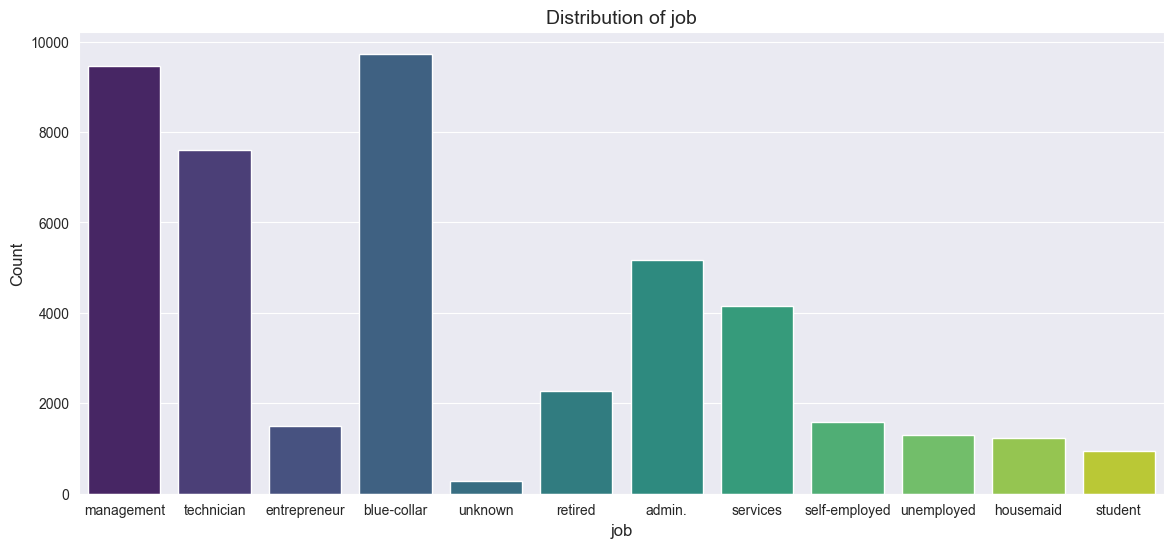

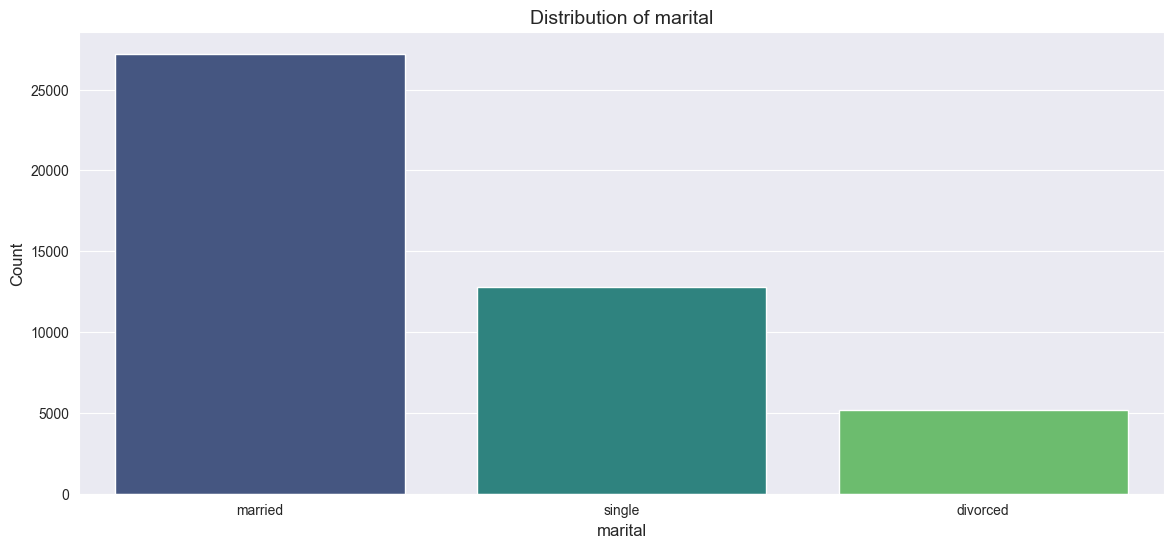

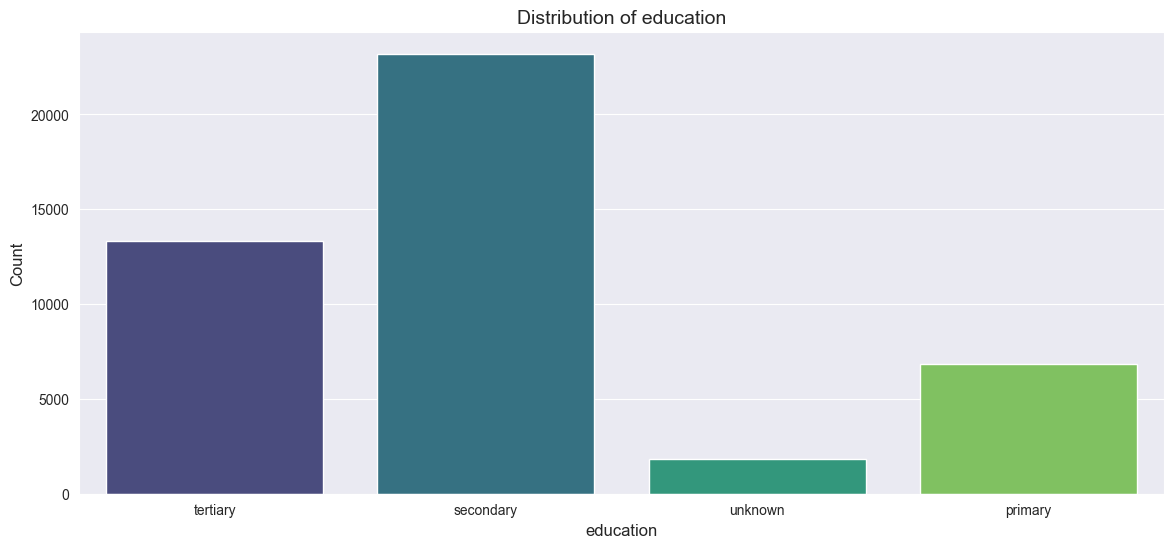

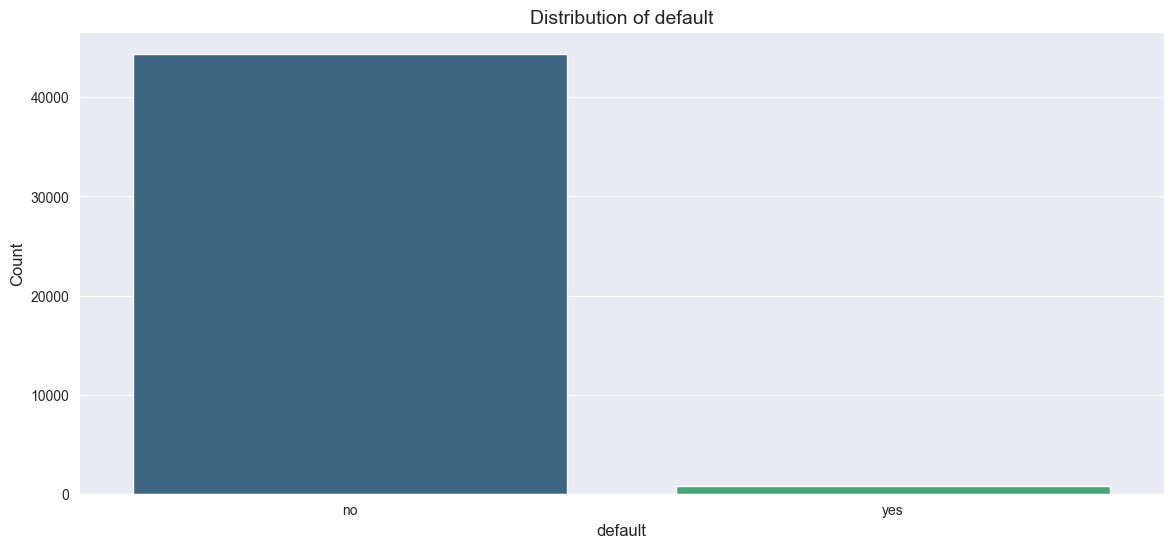

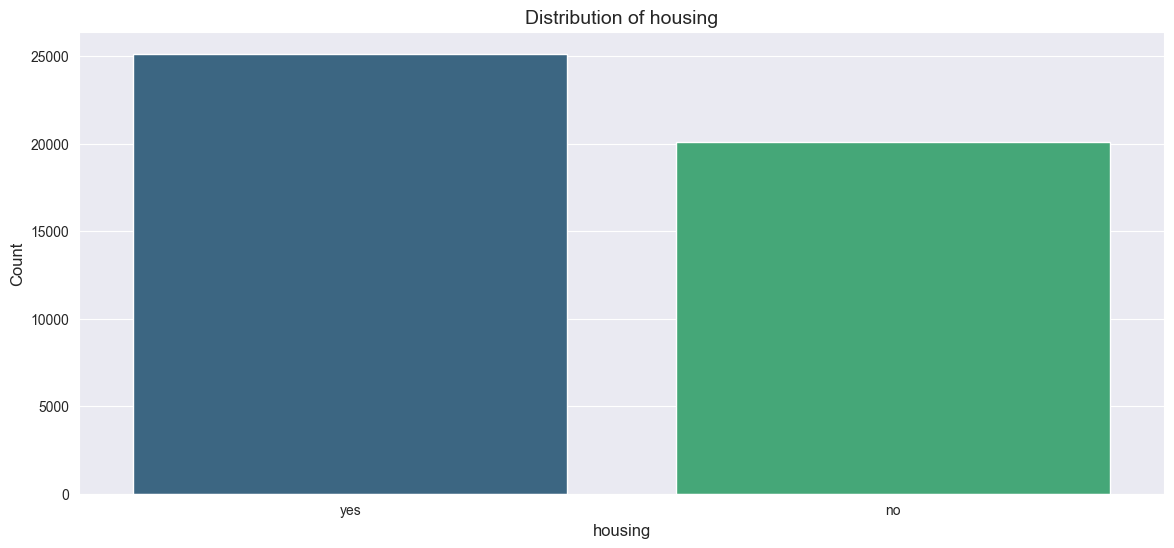

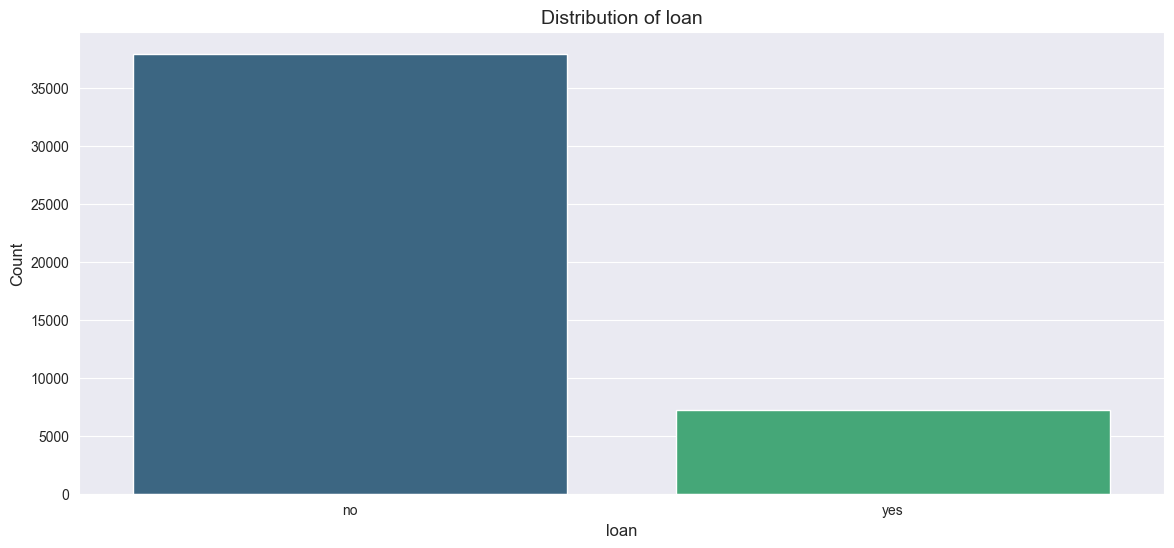

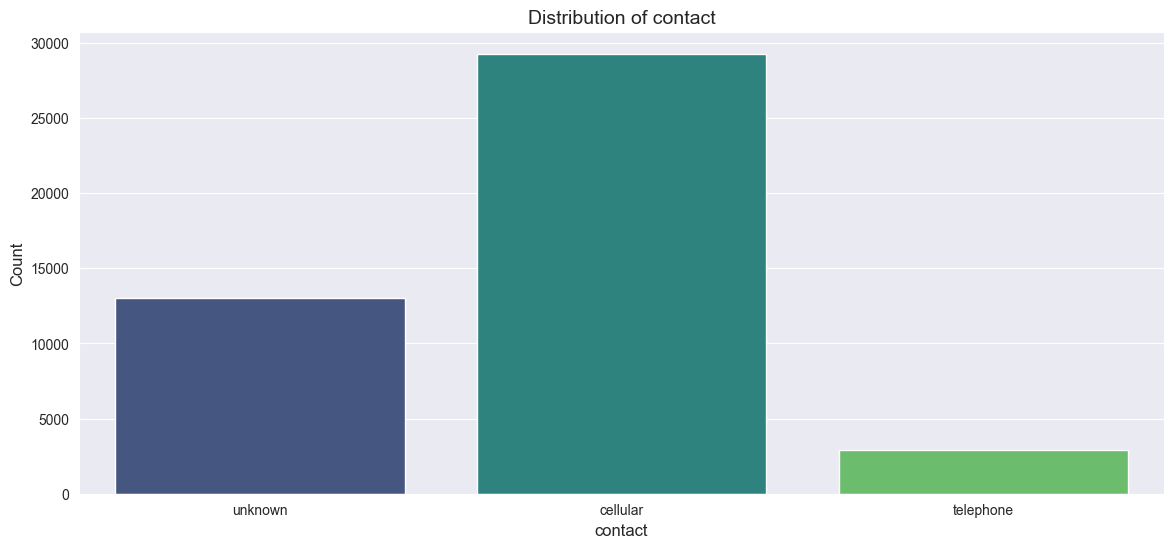

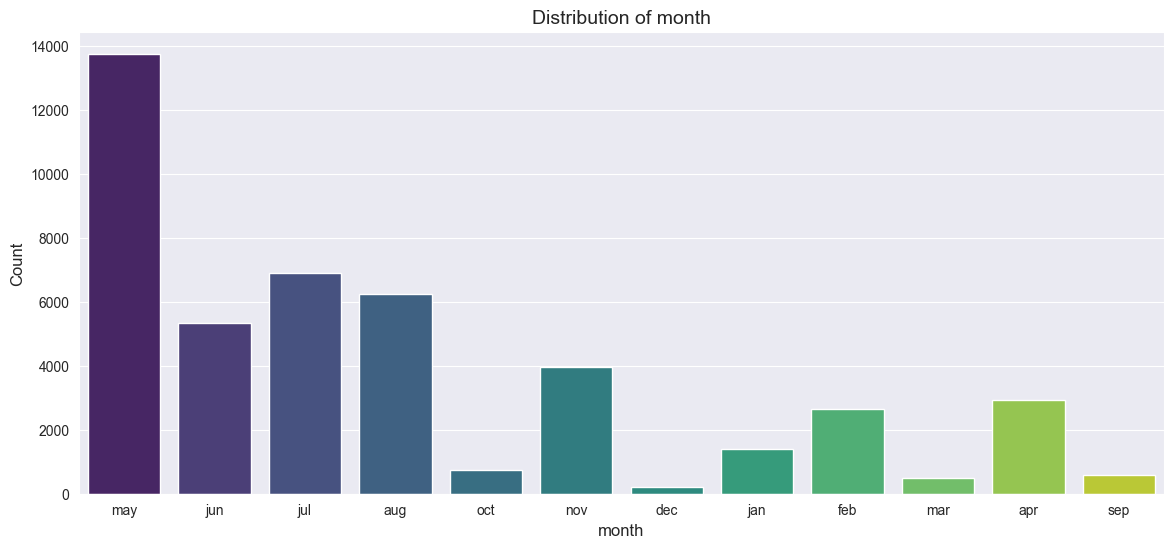

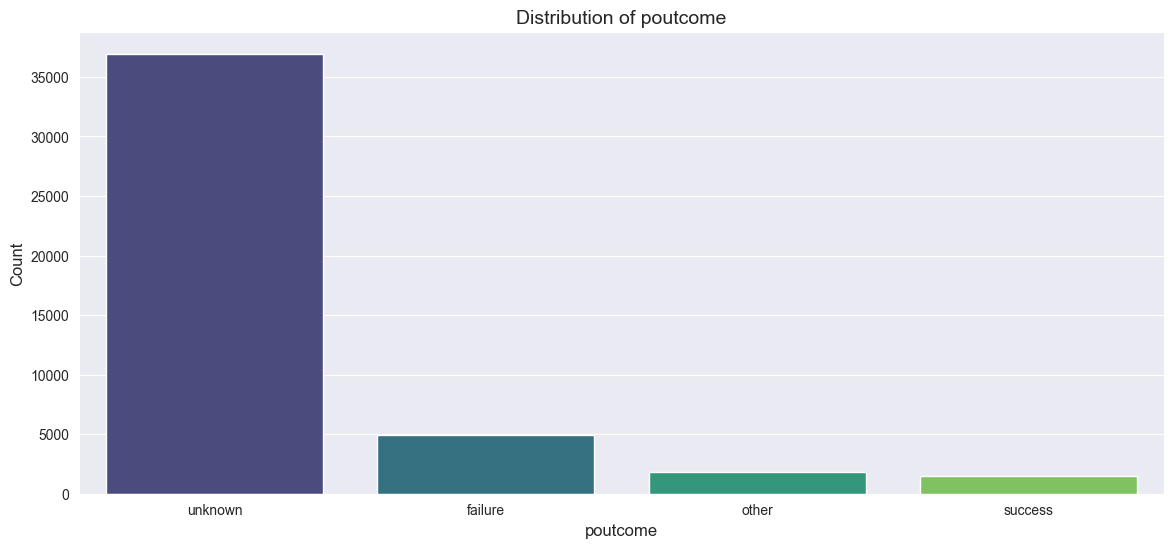

In [21]:
# plot unique values with count respect to each feature
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(data=data, x=feature, hue=feature, palette='viridis', legend=False)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

### Explore Numerical Features

In [22]:
# get numerical features of dataset
numerical_features = data.select_dtypes(include=['number']).columns

In [23]:
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [24]:
print("Total number of numerical features : ", len(numerical_features))

Total number of numerical features :  7


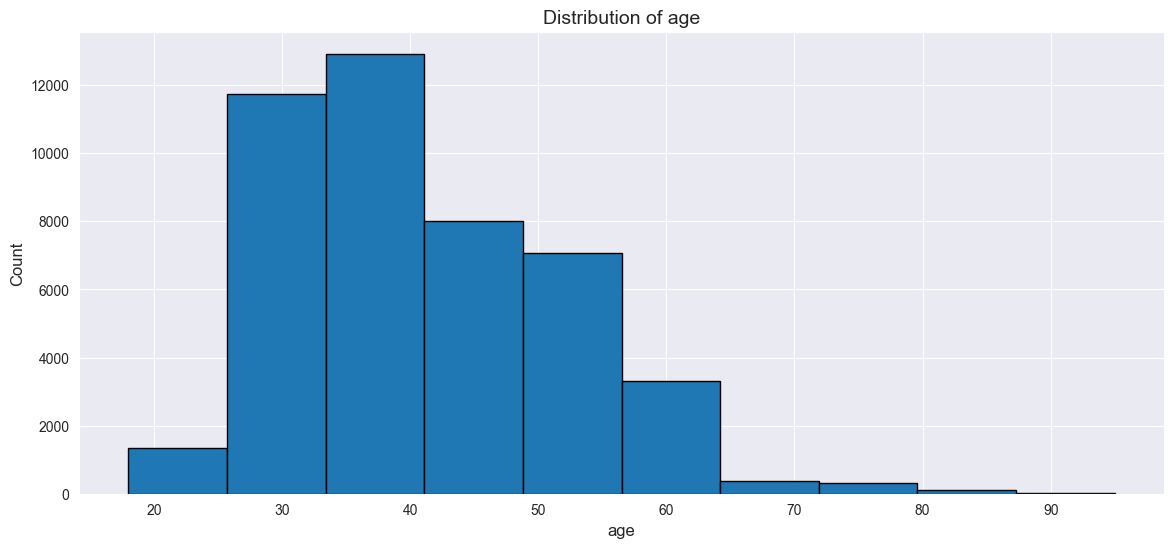

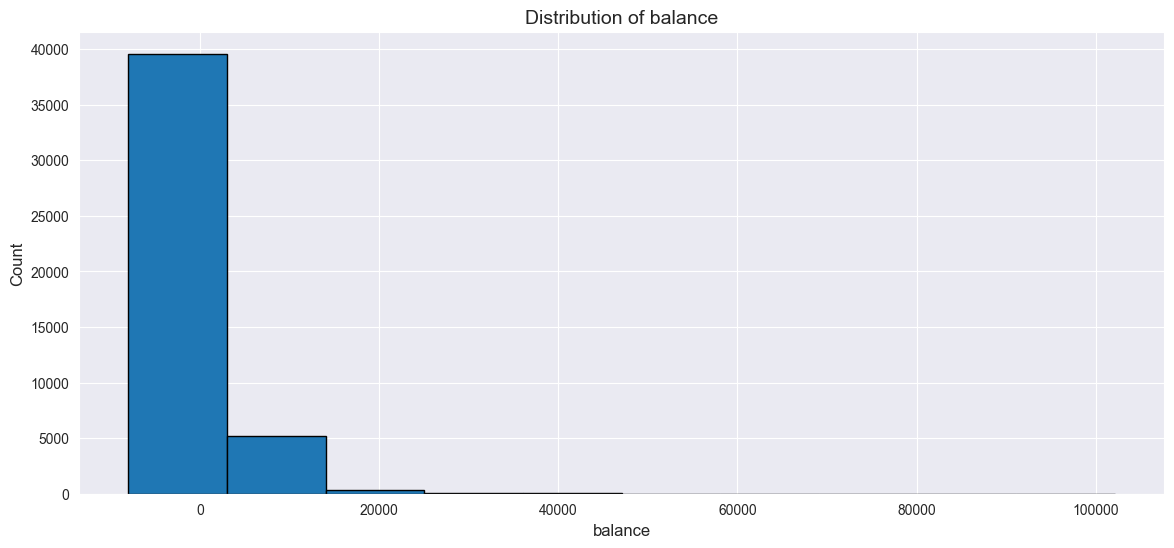

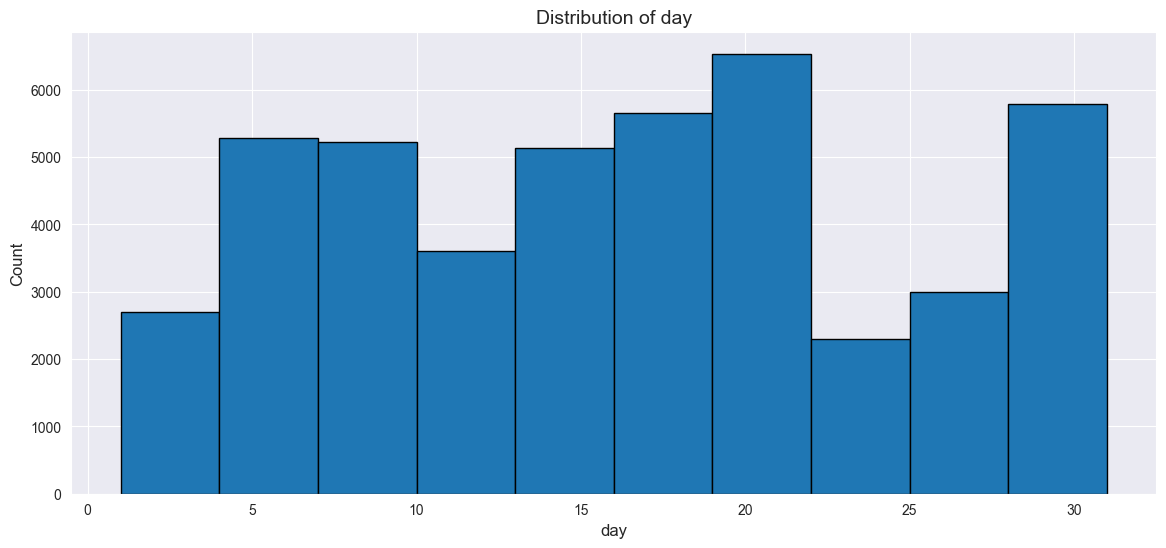

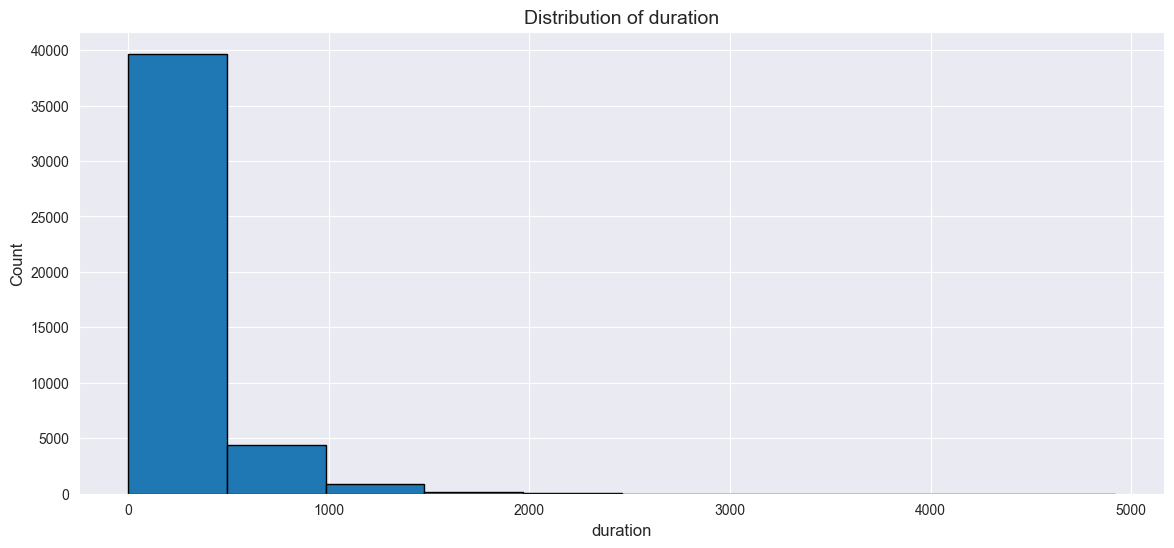

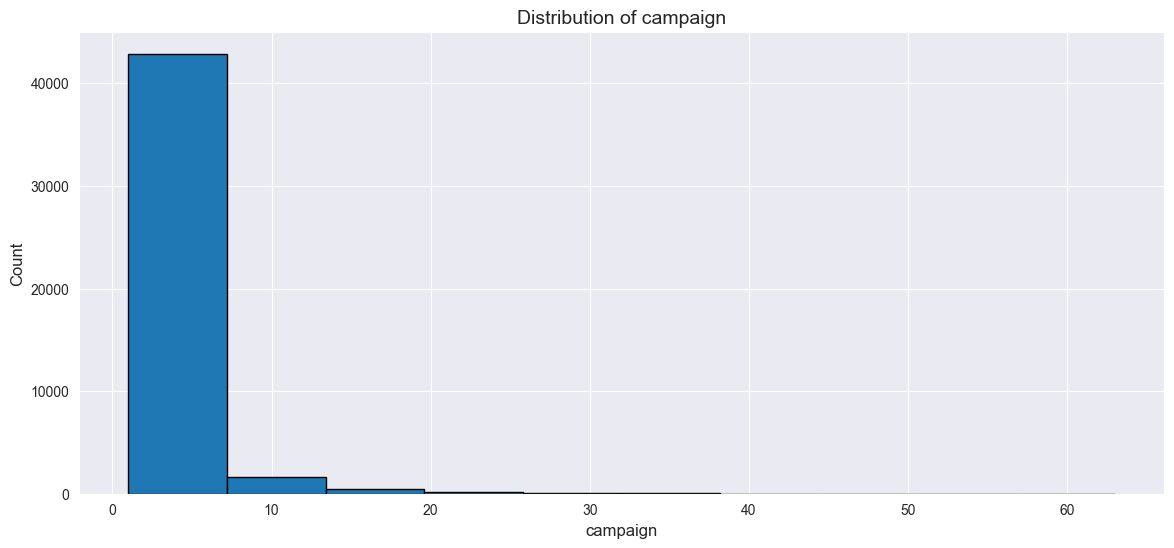

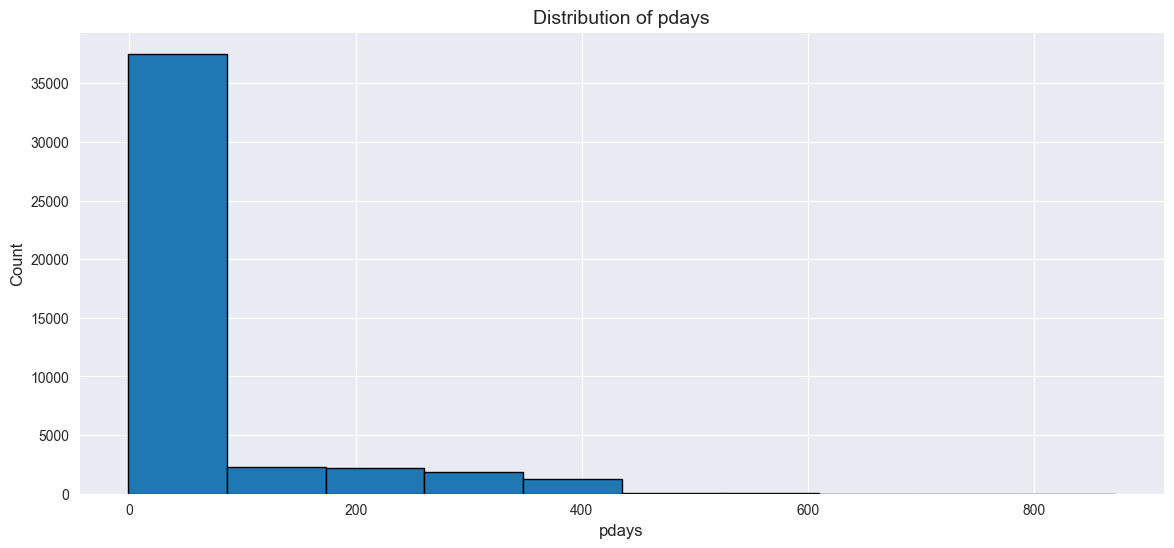

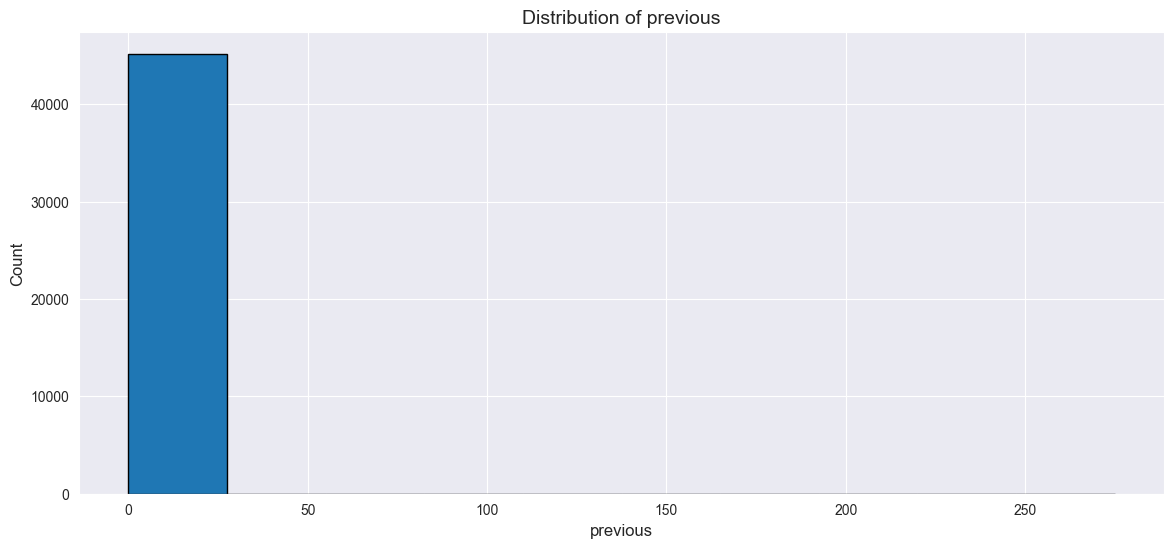

In [25]:
# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(14, 6))  # Set the figure size
    plt.hist(data[feature], bins=10, edgecolor='black')  # Plot histogram for the feature
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


In [26]:
# finding relationships between numerical variables using correlation matrix
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

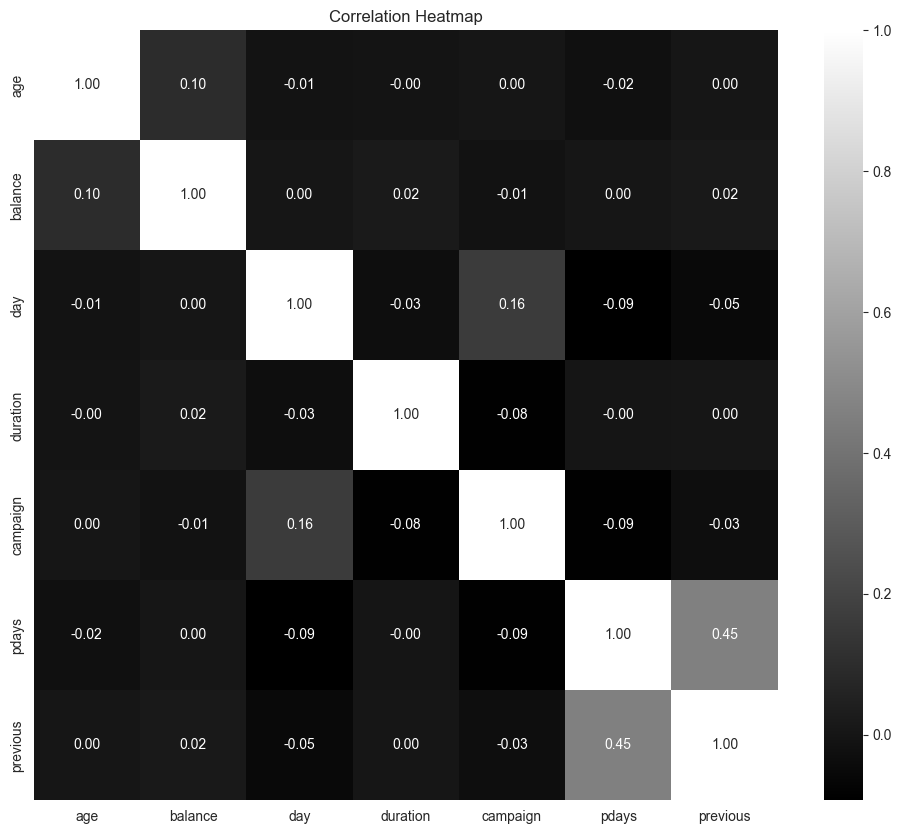

In [27]:
# plot the correlation matrix using heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="gray")
plt.title('Correlation Heatmap')
plt.show()

### Understand the Target Feature

In [28]:
# get target variable
target = data["y"]

In [29]:
target

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [30]:
# analyze the target variable if there is class unbalance problem
print("Target Class Distribution:")
count = target.value_counts()
print(count)

Target Class Distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


In [31]:
# check target variables as a percentage
print("Target Class Distribution as Percentage:")
target_as_percentage = target.value_counts() / len(data) * 100
print(target_as_percentage)

Target Class Distribution as Percentage:
y
no     88.30152
yes    11.69848
Name: count, dtype: float64


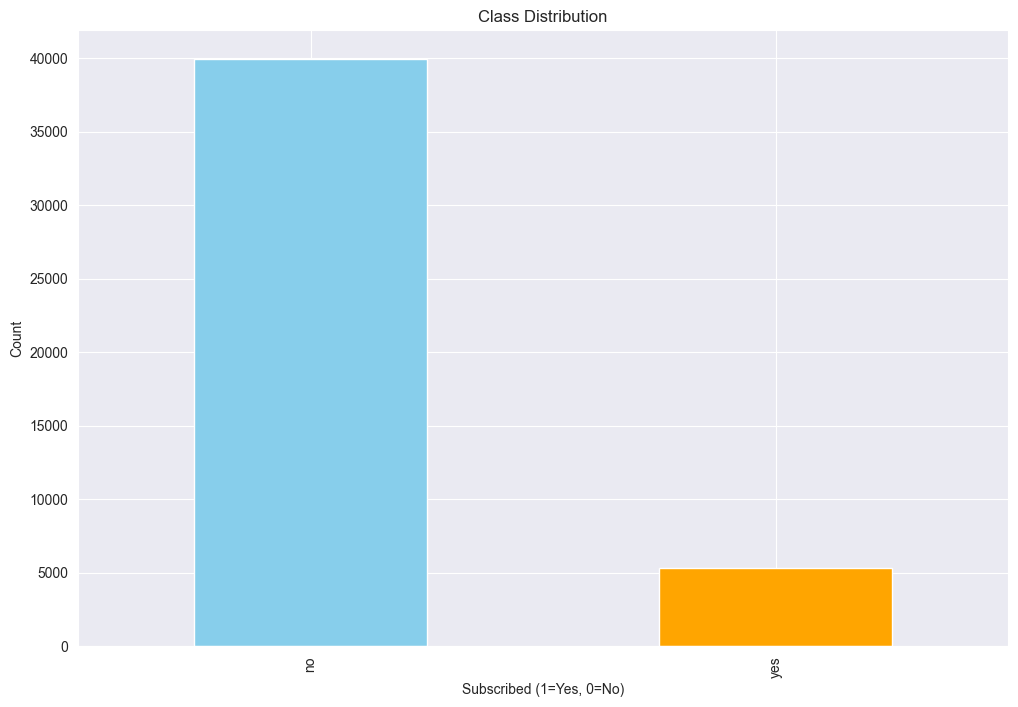

In [32]:
# visualize the target variable distribution
plt.figure(figsize=(12, 8))
target.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Subscribed (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

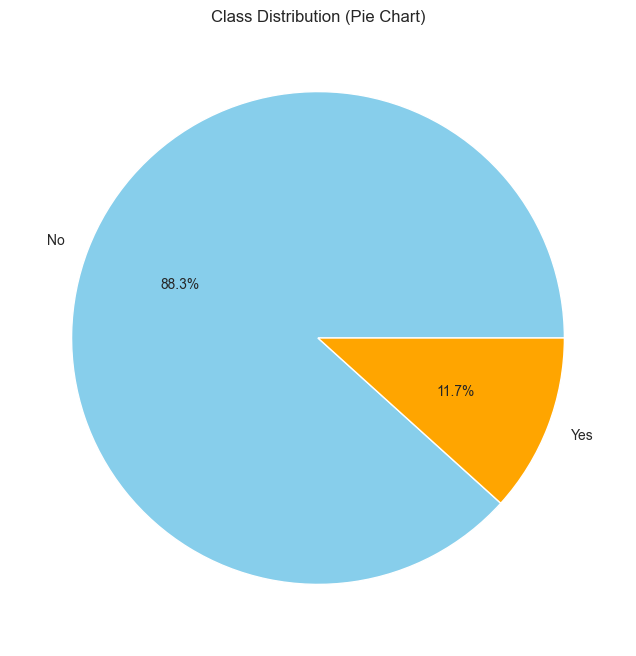

In [33]:
# Plot the pie chart for class distribution
plt.figure(figsize=(8, 8))
target.value_counts().plot(kind='pie', labels=['No', 'Yes'], colors=['skyblue', 'orange'], autopct='%1.1f%%')
plt.title("Class Distribution (Pie Chart)")
plt.ylabel("")  # Hides the y-label (unnecessary for pie chart)
plt.show()

### Feature Relationships

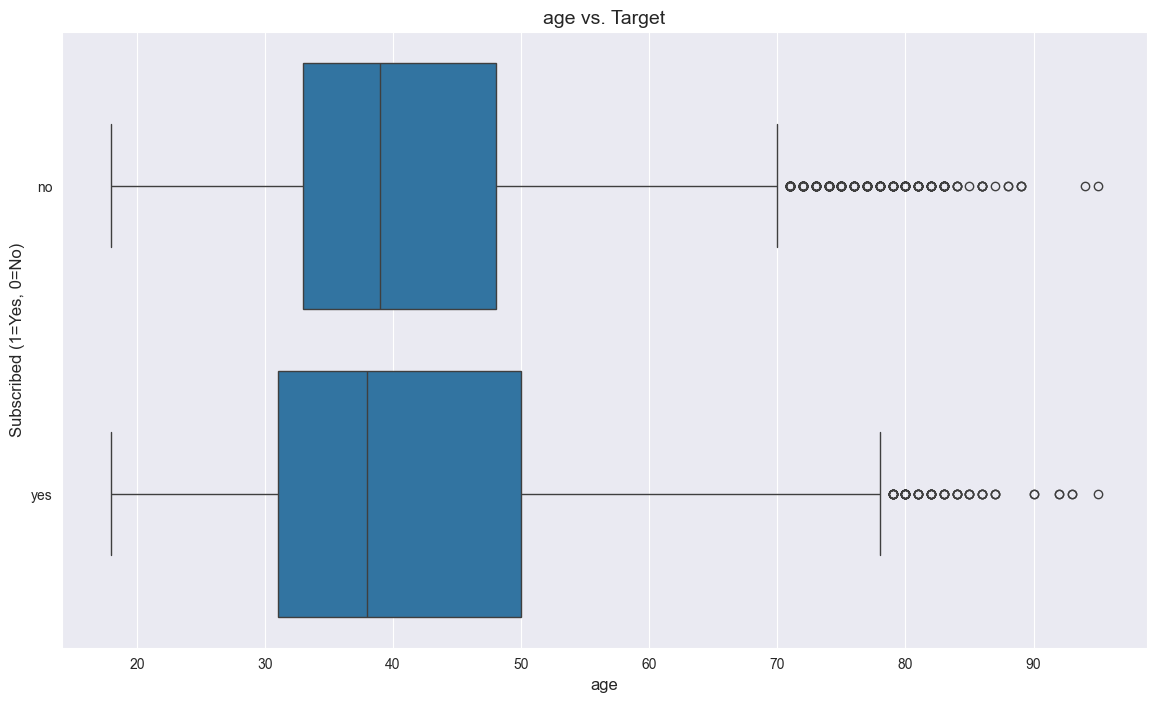

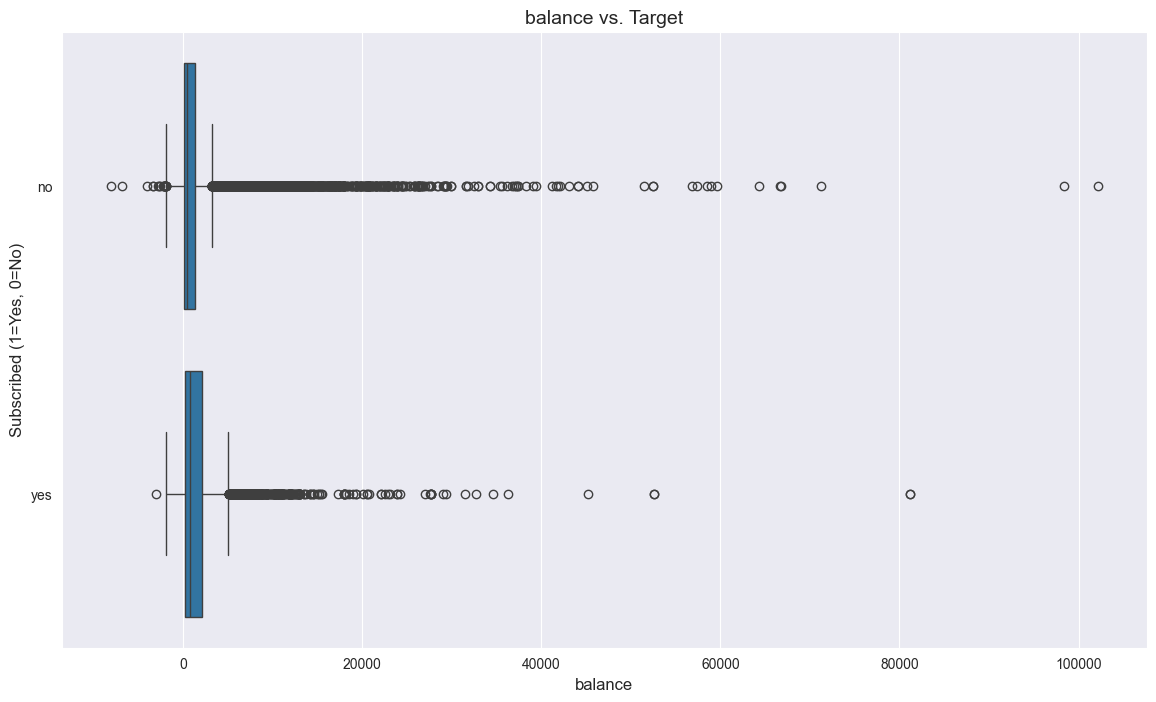

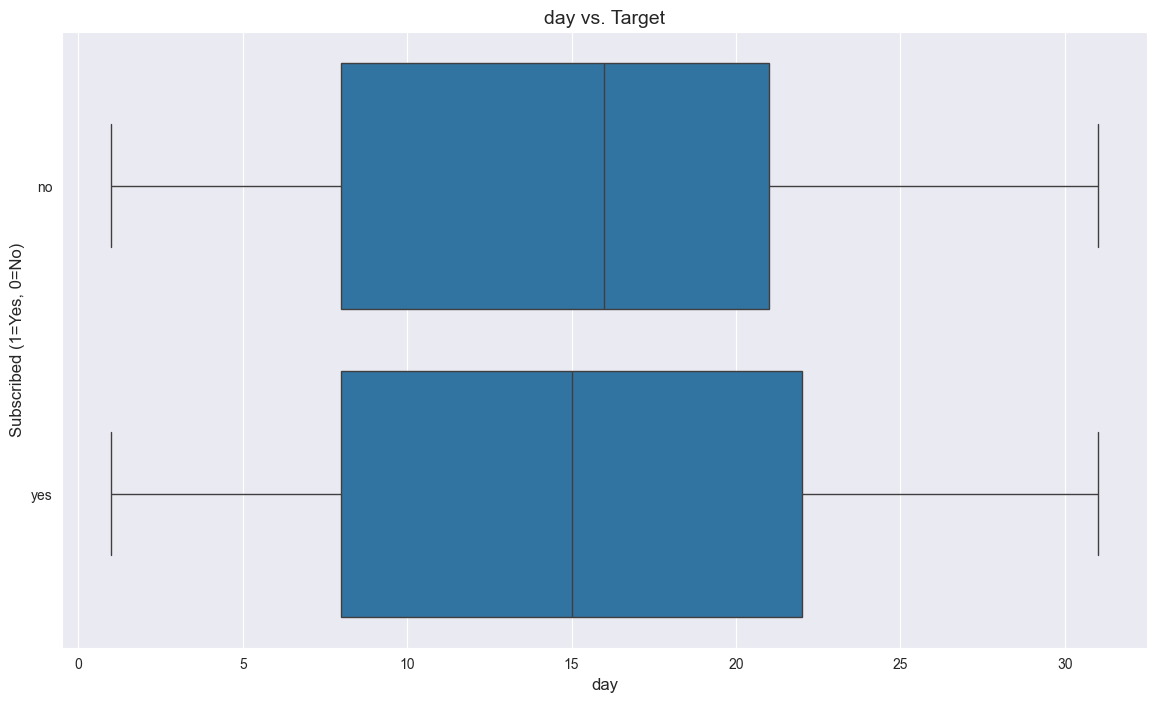

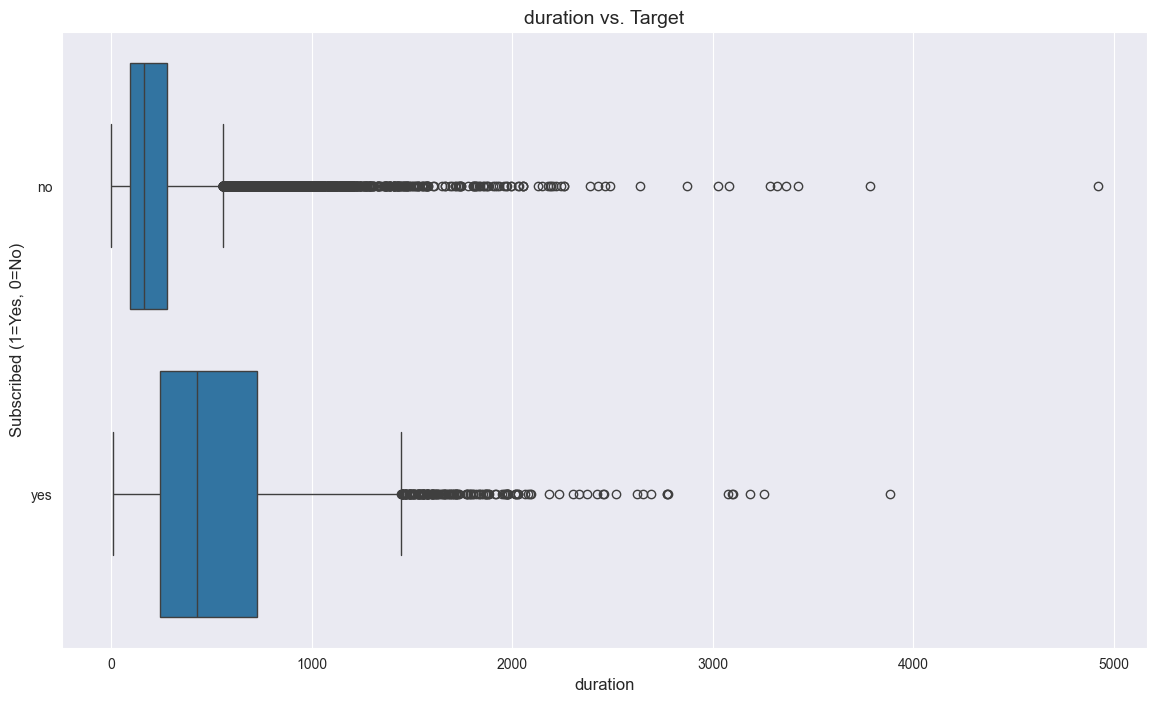

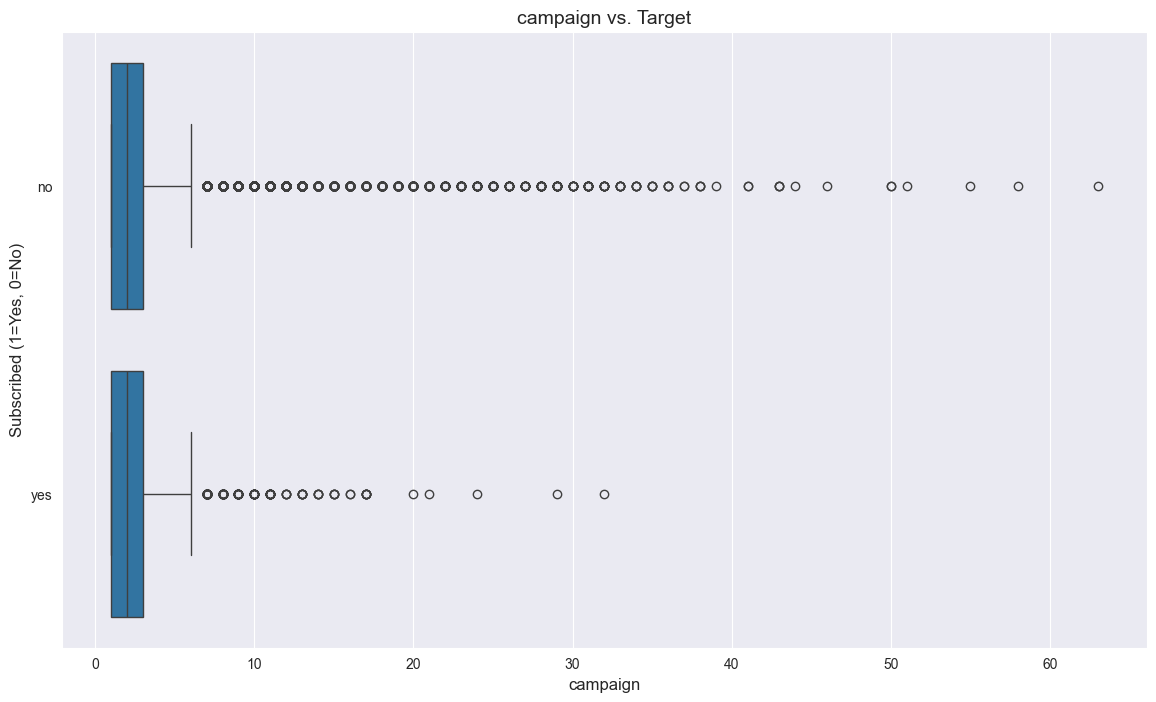

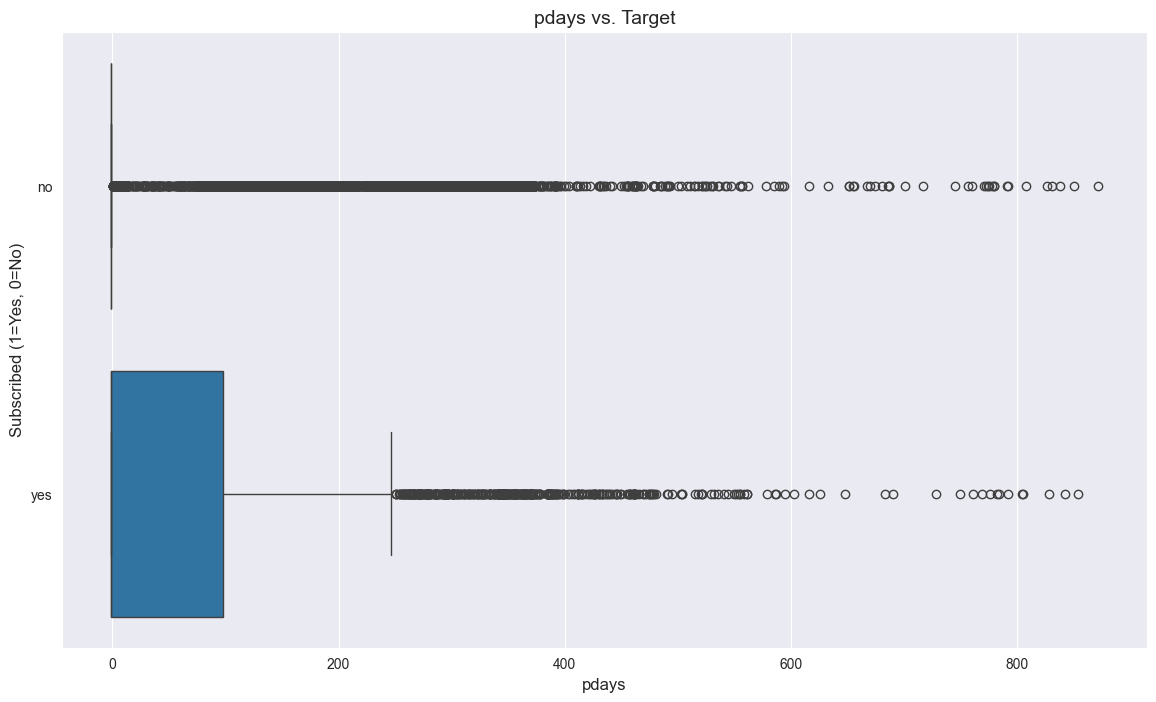

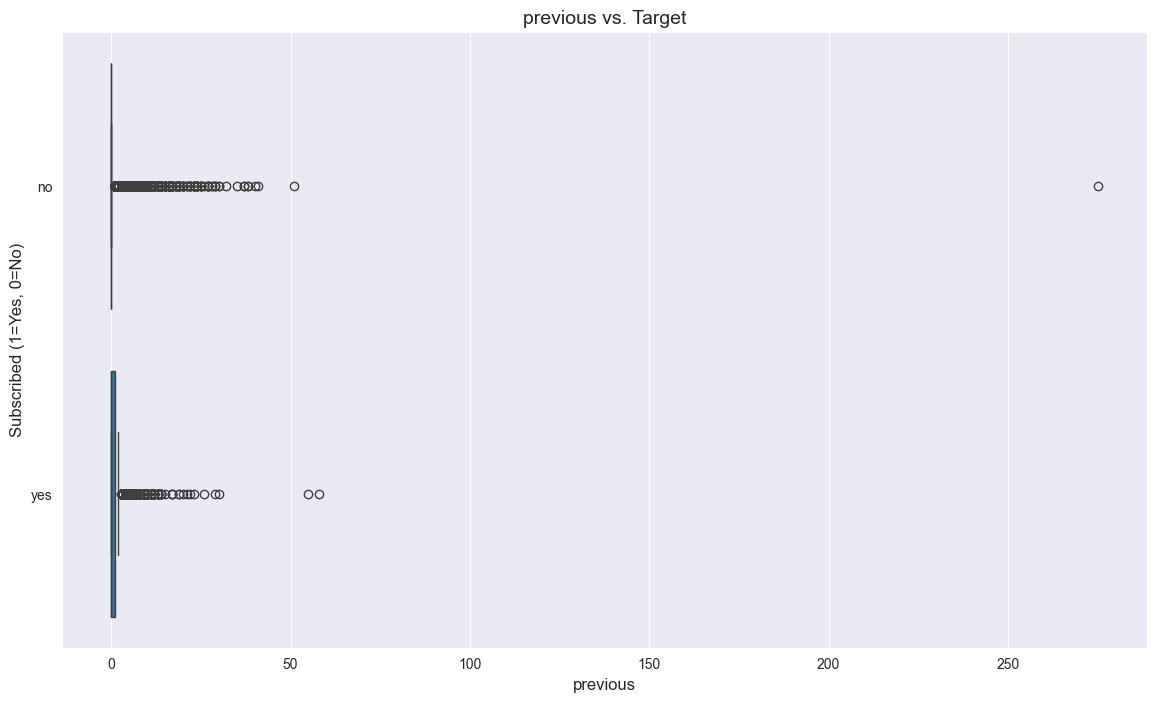

In [34]:
# find feature relationship between numerical features and target
for feature in numerical_features:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=feature, y='y', data=data)
    plt.title(f'{feature} vs. Target', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Subscribed (1=Yes, 0=No)", fontsize=12)
    plt.show()


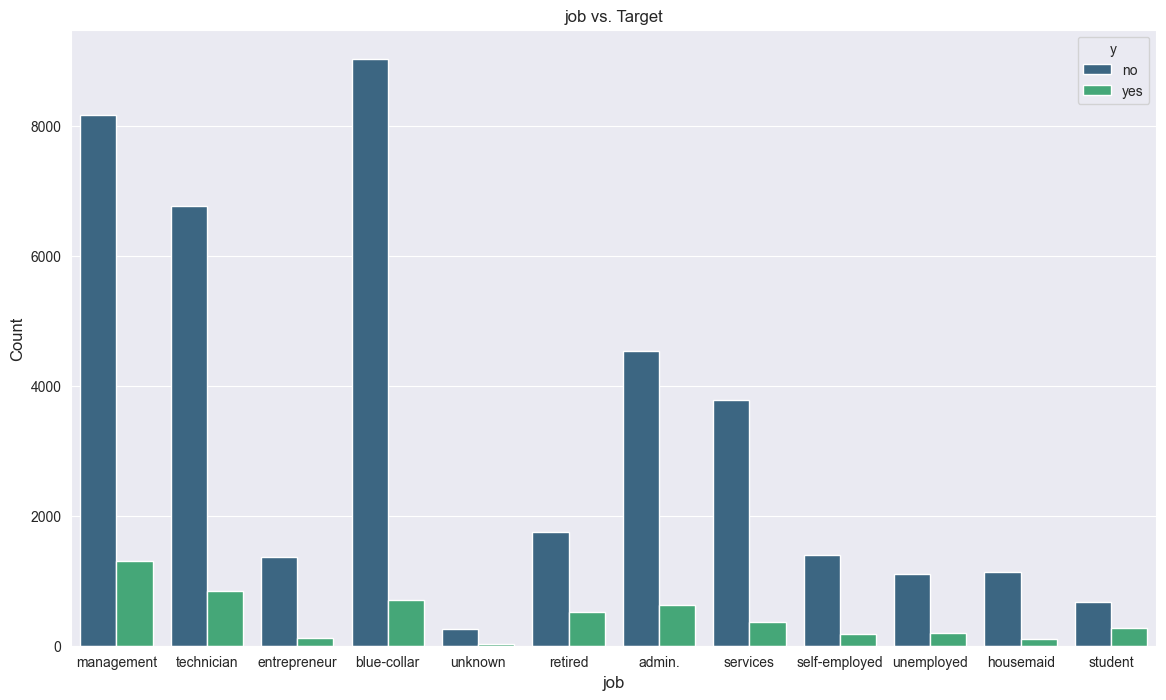

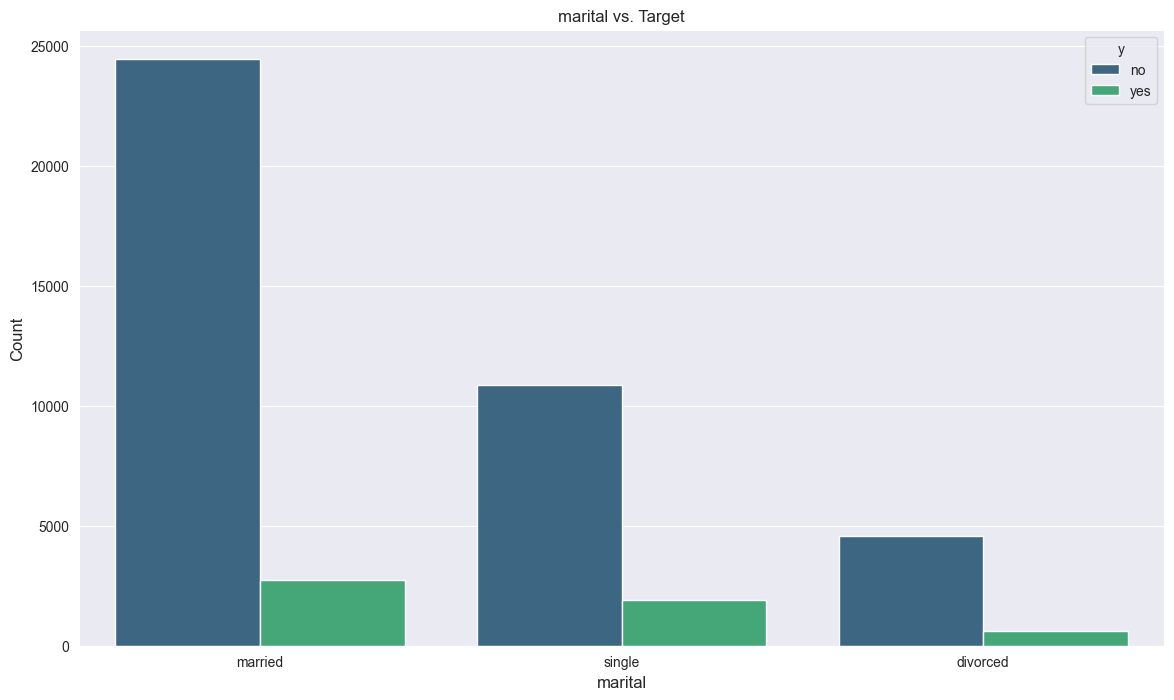

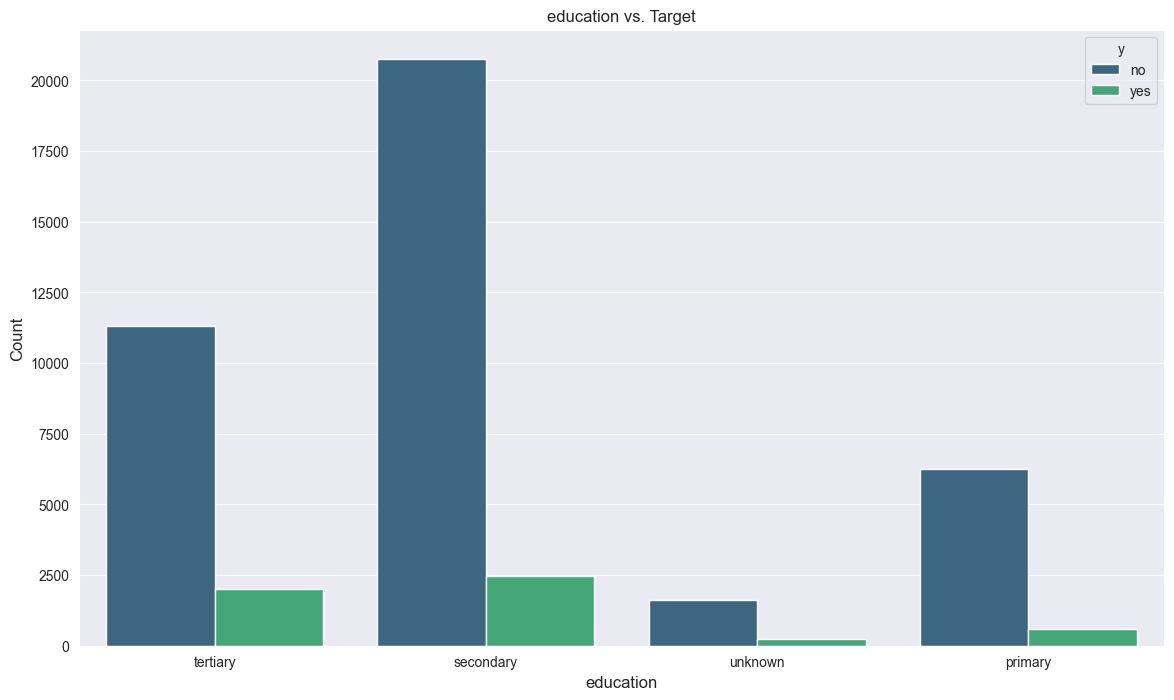

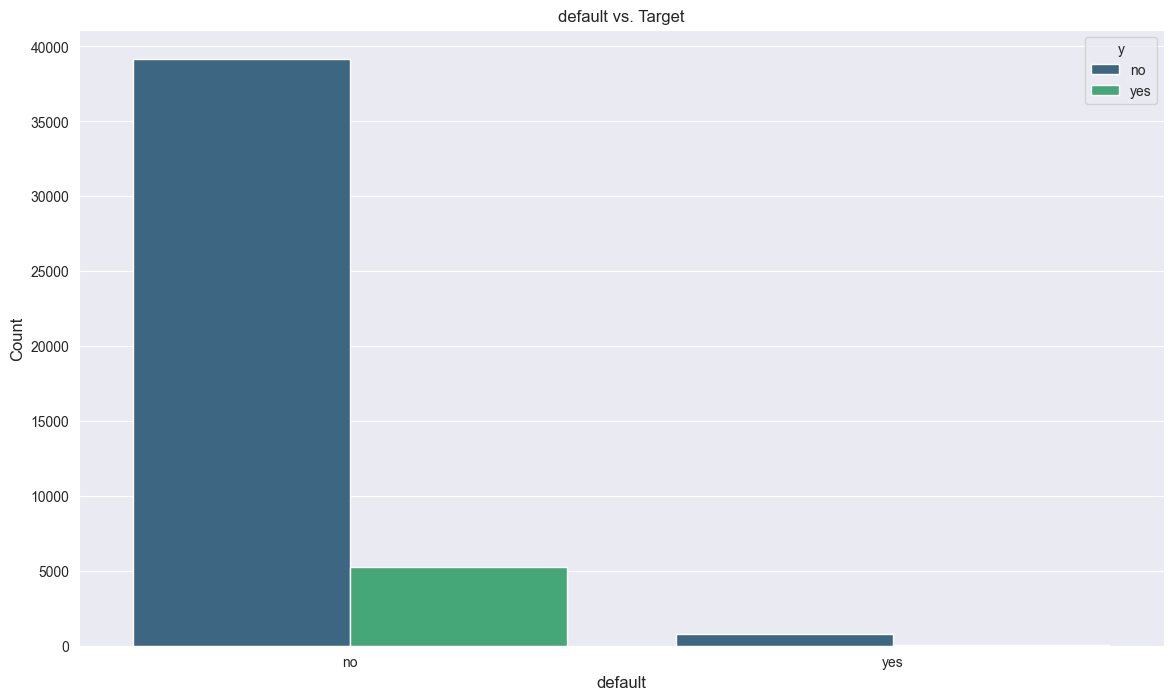

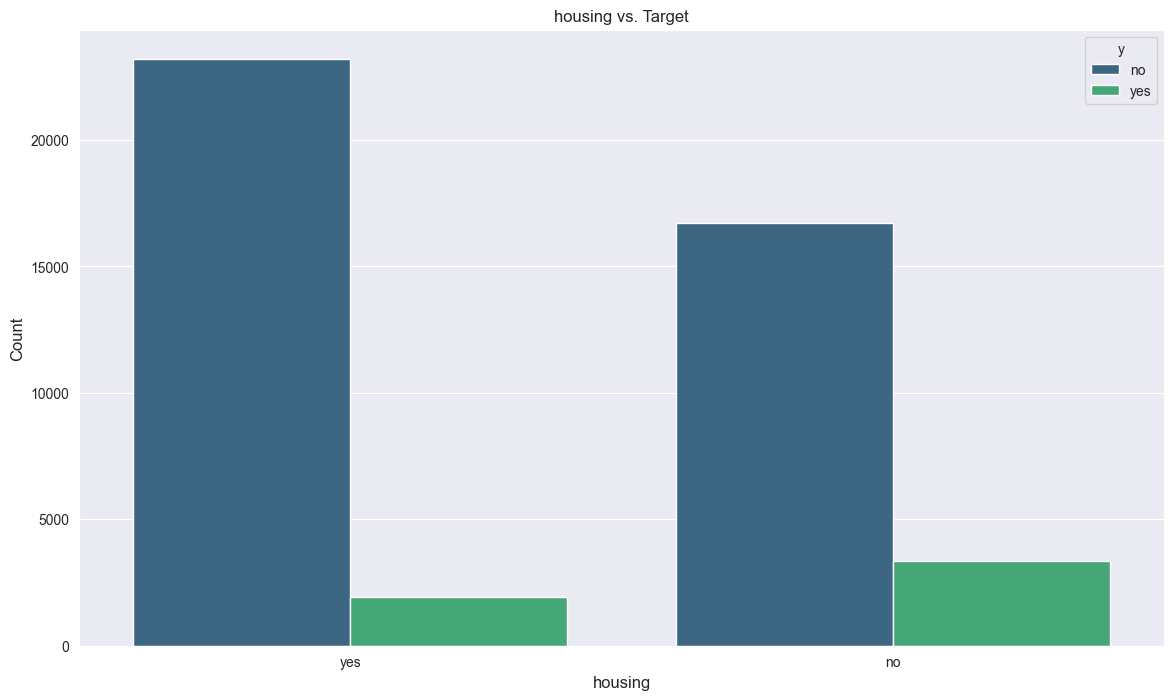

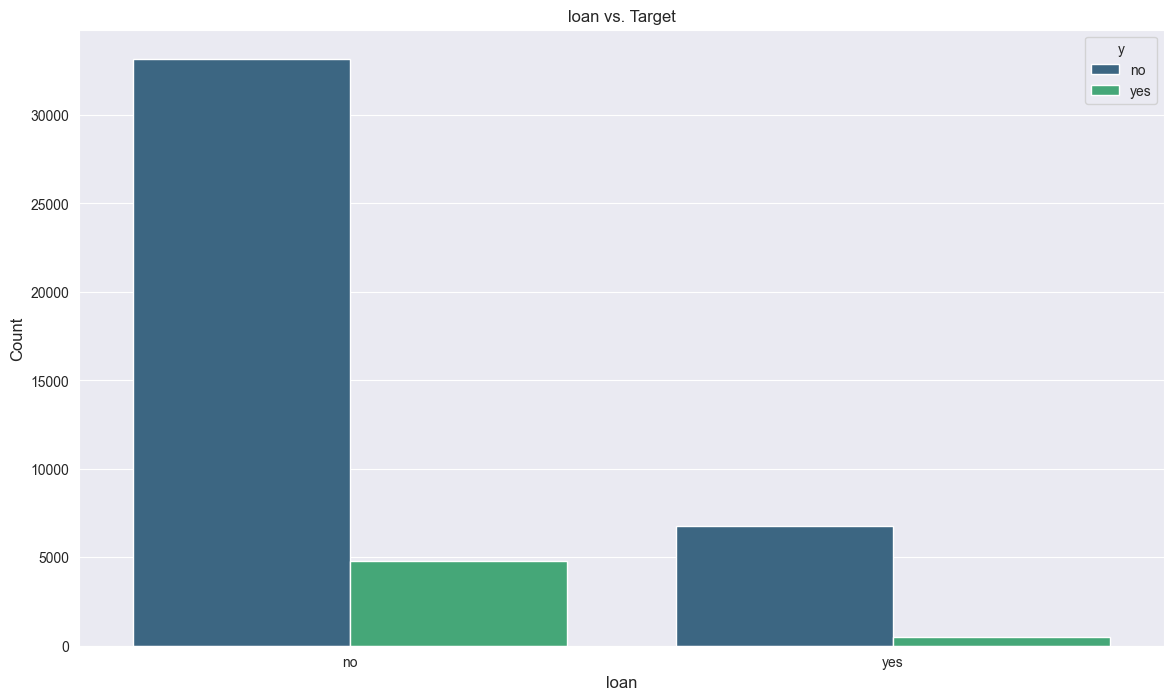

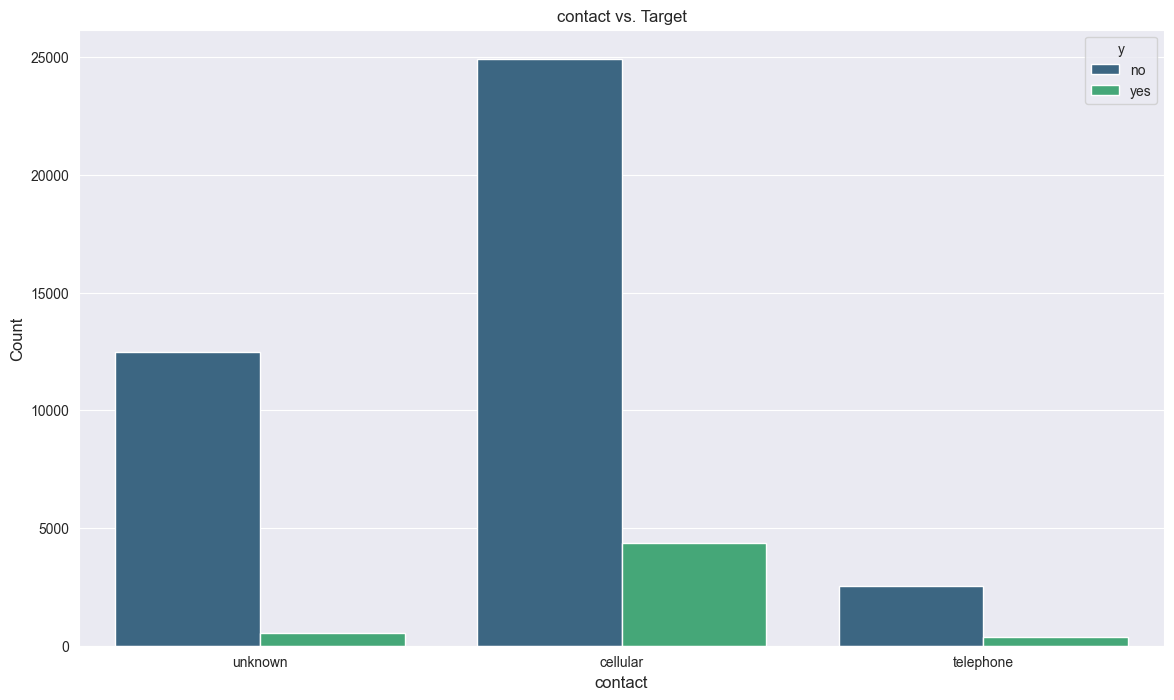

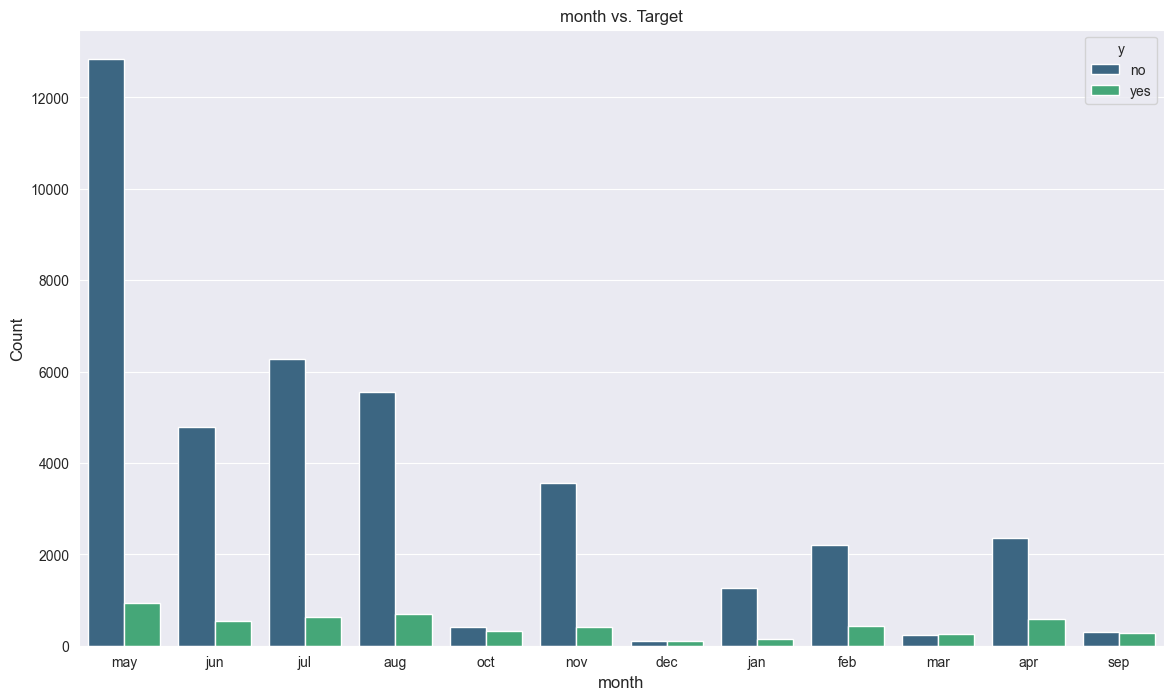

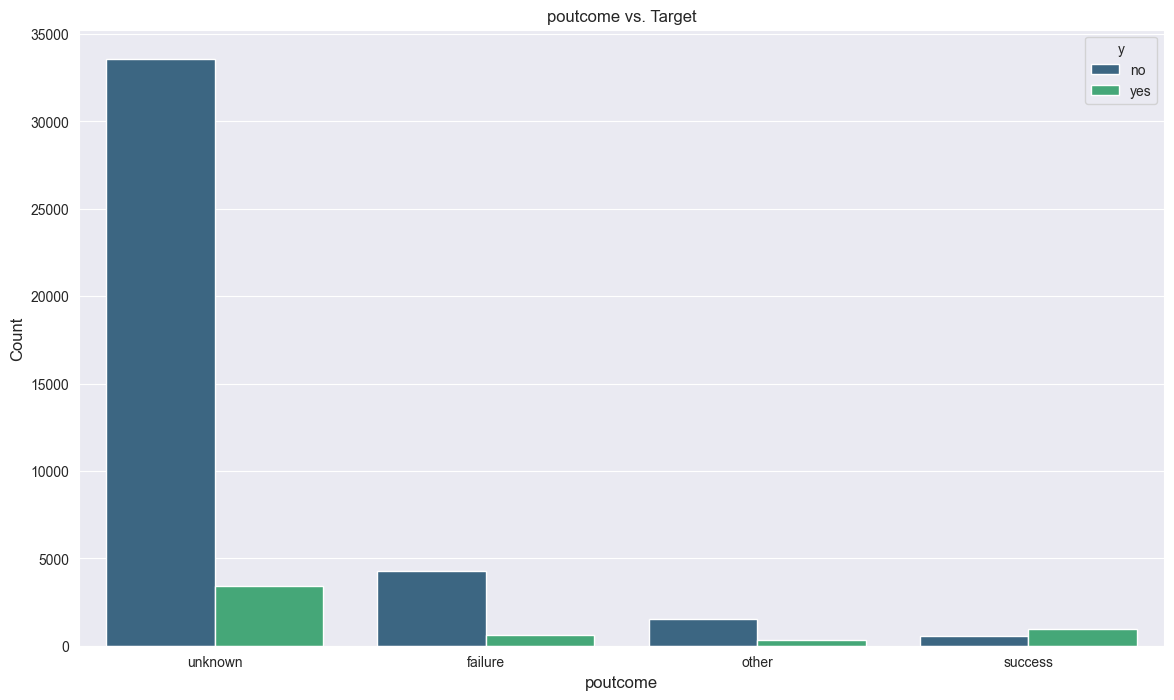

In [35]:
# find feature relationship between categorical features and target
for feature in categorical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=feature, hue='y', data=data, palette='viridis')
    plt.title(f'{feature} vs. Target')
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

# Data Cleaning

### Handle Outliers

In [36]:
# shape of dataset
data.shape

(45211, 17)

In [37]:
# shape of numerical data in dataset
numeric_data.shape

(45211, 7)

In [38]:
# calculate IQR for numeric features
Q1 = numeric_data.quantile(0.25)  # first quantile
Q3 = numeric_data.quantile(0.75)  # second quantile

IQR = Q3 - Q1  

In [39]:
# define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [40]:
print("Lower limit of numerical features:")
lower_bound


Lower limit of numerical features:


age           10.5
balance    -1962.0
day          -11.5
duration    -221.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64

In [41]:
print("Upper limit of numerical features:")
upper_bound

Upper limit of numerical features:


age           70.5
balance     3462.0
day           40.5
duration     643.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64

In [42]:
# create a mask for valid rows (no outliers in any numeric column)
mask = ((numeric_data >= lower_bound) & (numeric_data <= upper_bound)).all(axis=1)

In [43]:
# Apply the mask to the original DataFrame
data_cleaned = data[mask]

In [44]:
print("Cleaned Data Shape (All Columns):", data_cleaned.shape)

Cleaned Data Shape (All Columns): (28193, 17)


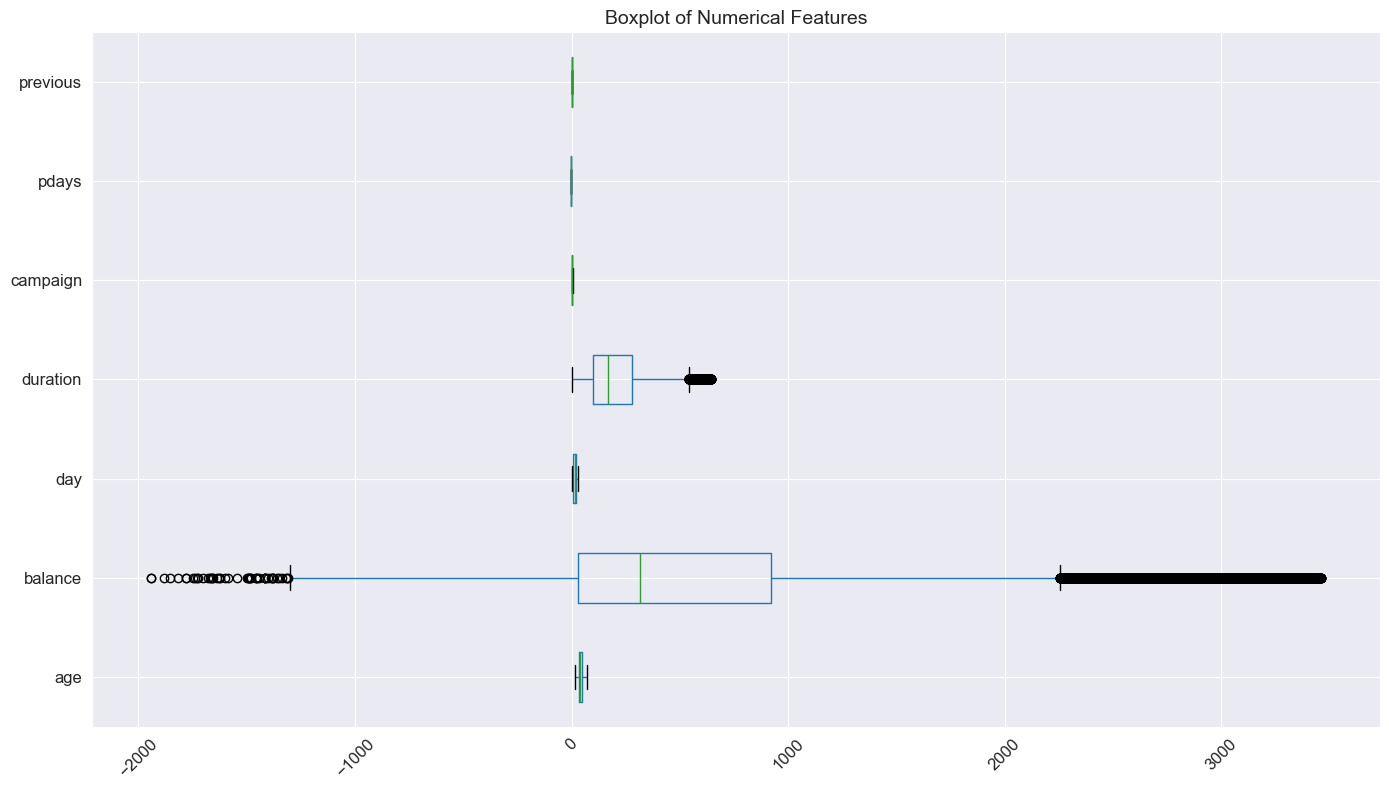

In [45]:
# generate boxplot for all numerical features
plt.figure(figsize=(14, 8))
data_cleaned.boxplot(vert=False)
plt.title("Boxplot of Numerical Features", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [61]:
# save to a new CSV
data_cleaned.to_csv("data\\cleaned_dataset.csv", index=False)

# Data transformation

In [62]:
data_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [64]:
X = data_cleaned.drop('y',axis=1)

y = data_cleaned['y']

In [66]:
from sklearn.preprocessing import LabelEncoder

In [81]:


encoder = LabelEncoder()

y = encoder.fit_transform(y)

y



array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [82]:
y.shape

(28193,)

In [102]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column in categorical_features
for col in categorical_features:
    X[col] = encoder.fit_transform(X[col])


In [103]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.769231,4,1,2,0,0.756012,1,0,2,0.133333,8,0.405910,0.0,0.0,0.0,0
1,0.500000,9,2,1,0,0.364965,1,0,2,0.133333,8,0.234837,0.0,0.0,0.0,0
2,0.288462,2,1,1,0,0.359970,1,1,2,0.133333,8,0.118196,0.0,0.0,0.0,0
3,0.557692,1,1,3,0,0.638180,1,0,2,0.133333,8,0.143079,0.0,0.0,0.0,0
4,0.288462,11,2,3,0,0.359785,0,0,2,0.133333,8,0.307932,0.0,0.0,0.0,0


In [93]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
# Instantiate the scaler
scaler = MinMaxScaler() 

# Scaling the numerical columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.769231,4,1,2,0,0.756012,1,0,2,0.133333,8,0.405910,0.0,0.0,0.0,0
1,0.500000,9,2,1,0,0.364965,1,0,2,0.133333,8,0.234837,0.0,0.0,0.0,0
2,0.288462,2,1,1,0,0.359970,1,1,2,0.133333,8,0.118196,0.0,0.0,0.0,0
3,0.557692,1,1,3,0,0.638180,1,0,2,0.133333,8,0.143079,0.0,0.0,0.0,0
4,0.288462,11,2,3,0,0.359785,0,0,2,0.133333,8,0.307932,0.0,0.0,0.0,0


# Data imbalance problem

In [129]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Confirm resampling
print("Original dataset shape:\n", pd.Series(y).value_counts())
print("Resampled dataset shape:\n", pd.Series(y_resampled).value_counts())

Original dataset shape:
 0    26594
1     1599
Name: count, dtype: int64
Resampled dataset shape:
 0    26594
1    26594
Name: count, dtype: int64


# Random forest

In [130]:
from sklearn.model_selection import train_test_split

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [134]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [135]:
# Predict on the test set
y_pred = rf_model.predict(x_test)


In [136]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [137]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5269
           1       0.96      0.97      0.97      5369

    accuracy                           0.97     10638
   macro avg       0.97      0.97      0.97     10638
weighted avg       0.97      0.97      0.97     10638



In [138]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[5044  225]
 [ 137 5232]]
